In [ ]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=440012f8e39db1d5547cdec743f48b294a8015d6e1da71e7f542fe7e6956ec50
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.0 MB/s 


In [ ]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, StratifiedKFold, cross_val_predict, RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, auc, roc_curve, confusion_matrix, f1_score, matthews_corrcoef, make_scorer
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn import preprocessing
from sklearn import linear_model, metrics, preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFECV, RFE
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import seaborn as sns
from skopt import BayesSearchCV
from bayes_opt import BayesianOptimization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Initialization

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/MSBA_6420_Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MSBA_6420_Project/test.csv')
train.shape, test.shape

((200000, 202), (200000, 201))

In [ ]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


# EDA

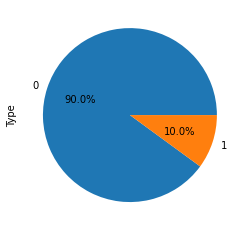

In [ ]:
# Check for Class Imbalance
train.groupby('target').size().plot(kind='pie',y = "target",label = "Type",autopct='%1.1f%%')

In [ ]:
# no missing values
train.isnull().any().any()
test.isnull().any().any()

False

Text(0.5, 0.98, 'Distribution of stds of all columns in Train/Test')

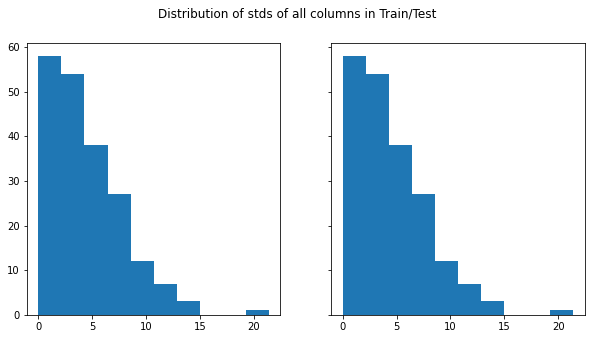

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].hist(train[train.columns[2:]].std())
axs[1].hist(test[test.columns[1:]].std())
fig.suptitle('Distribution of stds of all columns in Train/Test')

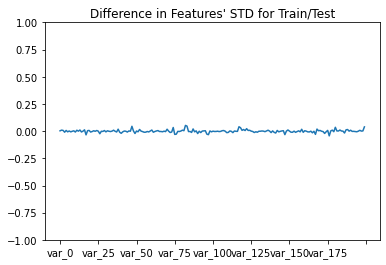

In [ ]:
diff_std = train[train.columns[2:]].std()-test[test.columns[1:]].std()
diff_std.plot()
plt.ylim(-1, 1)
plt.title("Difference in Features' STD for Train/Test")
plt.show()

Text(0.5, 0.98, 'Distribution of means of all columns in Train/Test')

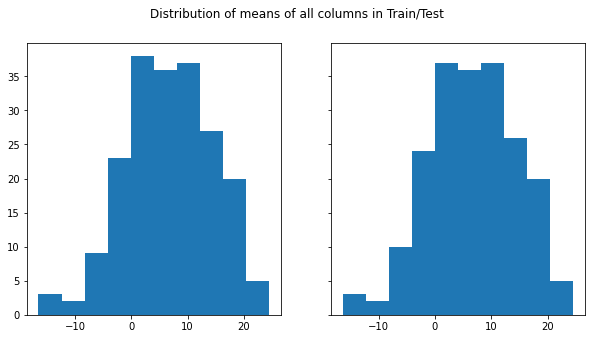

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].hist(train[train.columns[2:]].mean())
axs[1].hist(test[test.columns[1:]].mean())
fig.suptitle('Distribution of means of all columns in Train/Test')

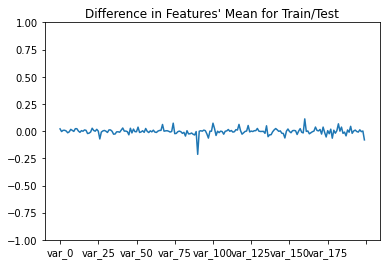

In [ ]:
diff_mean = train[train.columns[2:]].mean()-test[test.columns[1:]].mean()
diff_mean.plot()
plt.ylim(-1, 1)
plt.title("Difference in Features' Mean for Train/Test")
plt.show()

We can see that there is no big correlation between features both in training and testing dataset. Beside, there is also no strong correlation between features and the target. So we choose not to use techniques to eliminate the correlated features, but to use all the features.

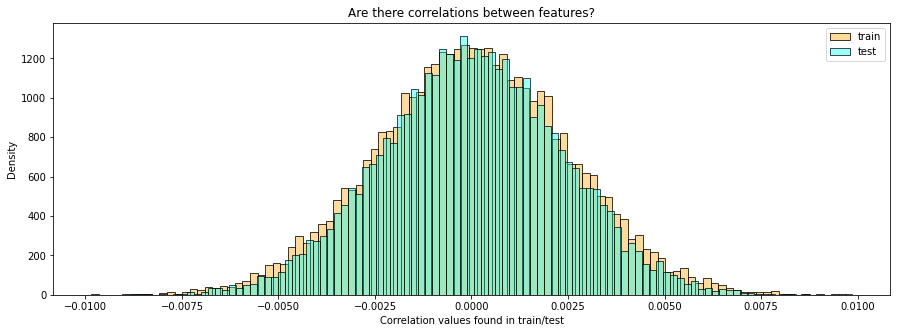

In [ ]:
# correlation
train_cor = train.drop(["target","ID_code"], axis=1).corr()
train_cor = train_cor.values.flatten()
train_cor = train_cor[train_cor != 1]

test_cor = test.drop(["ID_code"], axis=1).corr()
test_cor = test_cor.values.flatten()
test_cor = test_cor[test_cor!= 1]

plt.figure(figsize=(15,5))
sns.histplot(train_cor, color="orange", label="train", alpha=0.4)
sns.histplot(test_cor, color="aqua", label="test", alpha=0.4)
plt.xlabel("Correlation values found in train/test")
plt.ylabel("Density")
plt.title("Are there correlations between features?"); 
plt.legend()

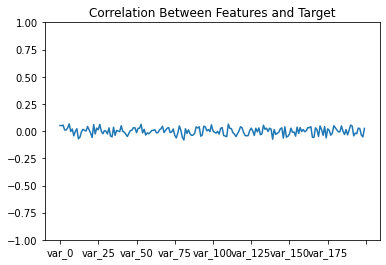

In [ ]:
# Correlation between features and target
corr_target = train[train.columns[1:]].corr()['target'][1:]
corr_target.plot()
plt.ylim(-1, 1)
plt.title("Correlation Between Features and Target")
plt.show()

According to many discussions in Kaggle, there are some synthetic samples in the test data.

https://www.kaggle.com/code/yag320/list-of-fake-samples-and-public-private-lb-split

https://github.com/btrotta/kaggle-santander-2019

In [ ]:
# distribution of the number of unique values in each row over columns
train_nunique = train.drop(["target","ID_code"], axis=1).nunique()
test_nunique = test.drop(["ID_code"], axis=1).nunique()

We can see that the training data have much more unique values than the testing data.

Text(0.5, 0.98, 'Distribution of Number of Unique Values in Train/Test')

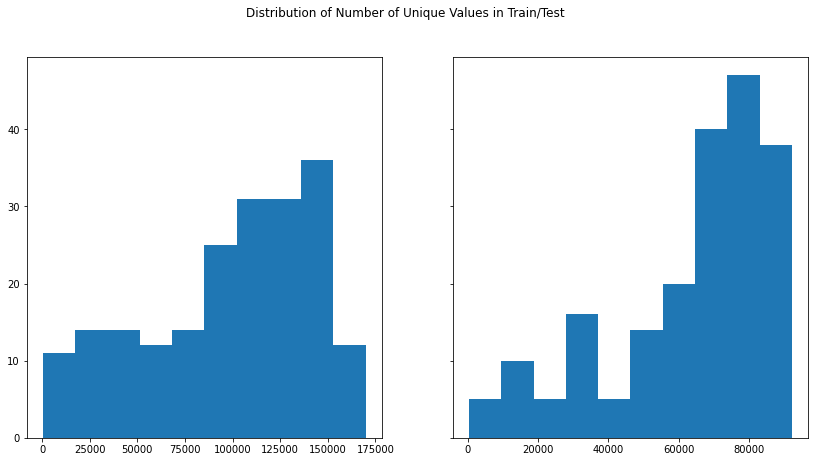

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
axs[0].hist(train_nunique)
axs[1].hist(test_nunique)
fig.suptitle('Distribution of Number of Unique Values in Train/Test')

# Feature Engineering/Creating Synthetic Data

If none of the values in a row is unique, we identify this row as synthetic data.

In [ ]:
# identify the fake test data
feature_names = train.columns.values.tolist()[2:]
unique_value = {}

for i in feature_names:
    sizes = test.groupby(i)['ID_code'].size()
    unique_value[i] = sizes.loc[sizes == 1].index
unique_bool = test.copy()

for i in feature_names:
    unique_bool[i] = test[i].isin(unique_value[i])
num_unique = unique_bool[feature_names].sum(axis=1)
test_real = test.loc[num_unique > 0]

In [ ]:
# add the counts
# if some values repeat more times than other values, this means these signals are more important
all_data = pd.concat([train, test], ignore_index=True, sort=True).reset_index()
count_data = pd.concat([train, test_real], axis=0, sort=True)
for c in train.columns.values.tolist()[2:]:
    all_size = count_data.groupby(c)['ID_code'].size().to_frame(c + '_size')
    count_data['rank'] = count_data[c].rank(method='first')
    count_data['bin'] = (count_data['rank'] - 1) // 300
    count_data['size'] = count_data.groupby(c)['ID_code'].transform('size')
    count_data['avg_size_in_bin'] = count_data.groupby('bin')['size'].transform('mean')
    count_data[c + '_size_scaled'] = count_data['size'] / count_data['avg_size_in_bin']
    all_size[c + '_size_scaled'] = count_data.groupby(c)[c + '_size_scaled'].first()
    all_data = pd.merge(all_data, all_size, 'left', left_on=c, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
train = all_data.loc[all_data['target'].notnull()].copy()
test = all_data.loc[all_data['target'].isnull()].copy()

In [ ]:
train.drop(['index'], axis=1, inplace=True)
test.drop(['index','target'], axis=1, inplace=True)

In [ ]:
train.drop(['ID_code'], axis=1, inplace=True)
test.drop(['ID_code'], axis=1, inplace=True)

In [ ]:
train.head()

,target,var_0,var_1,var_10,var_100,var_101,var_102,var_103,var_104,var_105,...,var_195_size,var_195_size_scaled,var_196_size,var_196_size_scaled,var_197_size,var_197_size_scaled,var_198_size,var_198_size_scaled,var_199_size,var_199_size_scaled
0,0.0,8.9255,-6.7863,2.9252,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,...,5,1.319261,5,1.908397,14,1.011561,5,1.429933,2,0.859599
1,0.0,11.5006,-4.1473,-0.4032,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,...,4,1.132075,4,1.459854,21,1.619121,6,1.269394,2,0.914634
2,0.0,8.6093,-2.7457,-0.3249,-0.3939,12.6317,14.8863,1.3854,15.0284,3.9995,...,2,0.683371,3,1.576182,12,1.052324,4,0.768738,2,0.914634
3,0.0,11.0604,-2.1518,2.3061,-19.8592,22.5316,18.6129,1.3512,9.3291,4.2835,...,8,1.111111,5,1.940492,4,0.664084,2,0.439883,2,1.025641
4,0.0,9.8369,-1.4834,-9.4458,-22.9264,12.3562,17.3410,1.6940,7.1179,5.1934,...,9,1.261682,5,1.704545,9,0.768793,2,0.428266,2,0.974026


In [ ]:
test.head()

,var_0,var_1,var_10,var_100,var_101,var_102,var_103,var_104,var_105,var_106,...,var_195_size,var_195_size_scaled,var_196_size,var_196_size_scaled,var_197_size,var_197_size_scaled,var_198_size,var_198_size_scaled,var_199_size,var_199_size_scaled
200000,11.0656,7.7798,-2.0248,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,...,3,1.179554,5,1.740139,4,1.307190,4,0.815772,4,1.944895
200001,8.5304,1.2543,-1.3809,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,...,18,1.994092,2,0.735294,11,1.254753,3,0.813743,3,2.017937
200002,5.4827,-10.3581,-4.7057,-3.5065,14.1663,28.0256,1.3935,10.8257,4.2954,8.2125,...,2,0.600601,1,0.561798,3,0.949367,2,0.639659,1,0.696056
200003,8.5374,-1.3222,0.0095,1.7021,2.5363,3.8763,1.5173,13.4083,2.8965,7.0919,...,4,1.323043,2,0.715990,10,0.846024,7,1.785714,1,0.429185
200004,11.7058,-0.1327,5.1025,-14.3858,17.8630,23.2274,1.4375,14.4838,4.3806,10.6976,...,11,1.323176,2,0.879765,4,1.136364,2,0.480384,3,1.339286


In [ ]:
features = train.iloc[:,1:].columns
target = train['target']

In [ ]:
features

Index(['var_0', 'var_1', 'var_10', 'var_100', 'var_101', 'var_102', 'var_103',
       'var_104', 'var_105', 'var_106',
       ...
       'var_195_size', 'var_195_size_scaled', 'var_196_size',
       'var_196_size_scaled', 'var_197_size', 'var_197_size_scaled',
       'var_198_size', 'var_198_size_scaled', 'var_199_size',
       'var_199_size_scaled'],
      dtype='object', length=600)

In [ ]:
print(train.shape)
print(test.shape)

(200000, 601)
(200000, 600)


### Bayesian Optimization




Using Bayesian optimization to find best hyperparameters. Implementation was found using link provided on Canvas: https://www.kaggle.com/code/sz8416/simple-bayesian-optimization-for-lightgbm/notebook

In [ ]:
X = train.iloc[:,1:]

In [ ]:
Y = train.iloc[:,0]

In [ ]:
def bayes_parameter_opt_lgb(X, Y, init_round=15, opt_round=25, n_folds=1, random_seed=45, n_estimators=10000, learning_rate=0.05, scale_pos_weight=8.95, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=Y, categorical_feature = 'auto', free_raw_data=False)
    # parameters
    def lgb_eval(num_leaves, max_bin, min_child_samples, reg_alpha, reg_lambda, feature_fraction, bagging_fraction, bagging_freq, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight):
        params = {'application':'binary','num_iterations': n_estimators, 'learning_rate':learning_rate, 'early_stopping_round':100, 'scale_pos_weight':scale_pos_weight, 'metric':'auc'}
        params['num_leaves'] = int(round(num_leaves))
        params['max_bin'] =  int(round(max_bin))
        params['min_child_samples'] = int(round(min_child_samples))
        params['reg_alpha'] =  int(round(reg_alpha))
        params['reg_lambda'] = int(round(reg_lambda))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['bagging_freq']= int(round(bagging_freq))
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
    # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (25, 33),
                                            'max_bin': (1000, 1050), 
                                            'min_child_samples': (900, 1100),
                                            'reg_alpha': (.05, 2.0),
                                            'reg_lambda': (0.1, 0.3),
                                            'feature_fraction': (0.5, 1.5),
                                            'bagging_fraction': (0.8, 1.2),
                                            'bagging_freq': (1,  3),
                                            'max_depth': (3, 8),
                                            'lambda_l1': (0, 7),
                                            'lambda_l2': (0, 5),
                                            'min_split_gain': (0.001, 0.0),
                                            'min_child_weight': (.001, .1)}, random_state=45)
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    # output optimization process
    if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
    # return best parameters
    return lgbBO.max   

opt_params = bayes_parameter_opt_lgb(X, Y, init_round=5, opt_round=10, n_folds=3, random_seed=45, n_estimators=100, learning_rate=0.05, scale_pos_weight=8.95)

|   iter    |  target   | baggin... | baggin... | featur... | lambda_l1 | lambda_l2 |  max_bin  | max_depth | min_ch... | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  1        |  0.8136   |  1.196    |  2.099    |  0.7814   |  0.541    |  2.222    |  1.024e+0 |  3.243    |  932.7    |  0.01248  |  0.000372 |  31.85    |  1.318    |  0.2981   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  2        |  0.8295   |  0.9881   |  2.237    |  0.7827   |  6.832    |  3.365    |  1.022e+0 |  4.448    |  1.002e+0 |  0.01213  |  0.000773 |  28.83    |  0.5234   |  0.1776   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  3        |  0.8492   |  1.128    |  1.149    |  1.423    |  1.574    |  3.532    |  1.006e+0 |  6.005    |  981.4    |  0.08385  |  0.00075  |  28.66    |  1.137    |  0.1504   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  4        |  0.8515   |  0.8441   |  2.453    |  0.8101   |  5.78     |  2.258    |  1.005e+0 |  7.436    |  1.048e+0 |  0.01307  |  0.000144 |  25.54    |  0.4087   |  0.1344   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  5        |  0.8404   |  1.169    |  2.333    |  0.7551   |  1.759    |  4.92     |  1.034e+0 |  5.012    |  912.8    |  0.04494  |  0.000792 |  27.58    |  1.316    |  0.2448   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        |  0.8477   |  1.061    |  1.607    |  0.9176   |  6.943    |  2.511    |  1.006e+0 |  6.278    |  1.05e+03 |  0.006963 |  0.0      |  26.03    |  0.8044   |  0.1254   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        |  0.853    |  0.9566   |  2.368    |  1.079    |  3.437    |  0.3361   |  1e+03    |  6.764    |  1.037e+0 |  0.05807  |  0.0      |  26.39    |  0.3312   |  0.2272   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        |  0.855    |  0.845    |  2.181    |  0.9851   |  1.066    |  4.497    |  1.019e+0 |  7.646    |  1.039e+0 |  0.07445  |  0.0      |  26.17    |  1.82     |  0.2125   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        |  0.8506   |  1.11     |  2.253    |  0.516    |  0.7158   |  3.313    |  1.039e+0 |  6.882    |  1.044e+0 |  0.0913   |  0.0      |  28.43    |  0.6425   |  0.1339   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       |  0.8475   |  1.044    |  1.946    |  0.971    |  1.381    |  4.462    |  1.048e+0 |  6.218    |  1.068e+0 |  0.04491  |  0.0      |  25.08    |  1.478    |  0.2392   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       |  0.812    |  1.073    |  1.47     |  0.6252   |  0.7267   |  1.378    |  1.05e+03 |  3.19     |  1.099e+0 |  0.04306  |  0.0      |  30.6     |  1.805    |  0.2819   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       |  0.8518   |  0.9234   |  1.881    |  0.7091   |  0.1412   |  1.657    |  1.028e+0 |  7.082    |  1.061e+0 |  0.05843  |  0.0      |  31.94    |  1.204    |  0.2671   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       |  0.8551   |  1.161    |  1.265    |  1.26     |  1.929    |  2.945    |  1e+03    |  7.555    |  1.085e+0 |  0.08197  |  0.0      |  29.72    |  0.2306   |  0.1179   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       |  0.8316   |  1.194    |  2.397    |  1.15     |  6.491    |  4.864    |  1.003e+0 |  3.759    |  1.1e+03  |  0.08969  |  0.0      |  28.4     |  1.684    |  0.1752   |


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       |  0.8546   |  1.156    |  1.273    |  1.428    |  0.5781   |  2.404    |  1.002e+0 |  7.553    |  1.07e+03 |  0.07123  |  0.0      |  26.24    |  1.324    |  0.2099   |


In [ ]:
opt_params

{'params': {'bagging_fraction': 1.1614187714019408,
  'bagging_freq': 1.2654287265211401,
  'feature_fraction': 1.2604099980246066,
  'lambda_l1': 1.929174065599001,
  'lambda_l2': 2.945469588455084,
  'max_bin': 1000.077686459091,
  'max_depth': 7.555001034184233,
  'min_child_samples': 1085.305999905374,
  'min_child_weight': 0.08197195111900206,
  'min_split_gain': 0.0,
  'num_leaves': 29.71919828832874,
  'reg_alpha': 0.23063663432603598,
  'reg_lambda': 0.11793226660459902},
 'target': 0.8550786836117683}

Parameters learned from Bayesian Optimization. These are from previous iteration of Bayes Optimization that yielded a higher score than running them with the magic features. 

In [ ]:
param = {
  'learning_rate': .05,
  'bagging_fraction': 0.902521322815825,
  'bagging_freq': 1,
  'feature_fraction': 1.0,
  'lambda_l1': 4.1721172821564645,
  'lambda_l2': 0.016372953387883693,
  'max_bin': 1050,
  'max_depth': 8,
  'min_child_samples': 1023,
  'min_child_weight': 0.051005148095158,
  'min_split_gain': 0.0,
  'num_leaves': 27,
  'reg_alpha': 0.05557302129673095,
  'reg_lambda': 0.2965997314178622, 'objective': 'binary', 'metric':'auc', 'learning_rate':0.05, 'boost_from_average':'false'}

# Stratified K Fold / Model Training

To help with the stratified K fold implementaiton we looked to this post: https://www.kaggle.com/code/jesucristo/30-lines-starter-solution-fast

In [ ]:
folds = StratifiedKFold(n_splits=6, shuffle=False)
oof = np.zeros(len(train)) #used to show ROC score on validation tests, not needed for testing prediciton
predictions = np.zeros(len(test)) # mimics the testing data but with zero values, the predictions for each value will appended to this 

In [ ]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("Fold {}".format(fold_))
    train_dataset = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])  # sets up training data
    val_dataset = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])  # sets up validation data
    clf = lgb.train(param, train_dataset, 100000, valid_sets = [train_dataset, val_dataset], verbose_eval=5000, early_stopping_rounds = 100) # trains the model
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration) # used to calculate the roc score in the following cell, not needed in the testing prediction
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits  # the division of folds.n_splits is a great way to get the average of the best predictions for each k fold
    # use best_iteration to get the best iteration when using early stopping

Fold 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1377]	training's auc: 0.988208	valid_1's auc: 0.907907
Fold 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1434]	training's auc: 0.989451	valid_1's auc: 0.909024
Fold 2
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1131]	training's auc: 0.982911	valid_1's auc: 0.904974
Fold 3
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1183]	training's auc: 0.983642	valid_1's auc: 0.910747
Fold 4
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1058]	training's auc: 0.98063	valid_1's auc: 0.909093
Fold 5
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1186]	training's auc: 0.984026	valid_1's auc: 0.911681


In [ ]:
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

CV score: 0.90885 


# Output of Predictions to CSV

In [ ]:
id_list = []
for i in range(200000):
  id_list.append('test_' + str(i))

In [ ]:
results = pd.DataFrame(list(zip(id_list, predictions)), columns=['ID_code', 'target'])

In [ ]:
output_path = '/content/drive/MyDrive/MSBA_6420_Project/MSBA_6420_Garett_Carlblom_Submission.csv'

In [ ]:
results.to_csv(output_path, index=False)